### Natisha Mallick - EC22373

## Assignment 1 - Part 1

### 4. LOADING DATASET- country-income.csv

In [1]:
import pandas as pd 
df = pd.read_csv('./country-income.csv')

In [2]:
print(df.shape)

(10, 4)


In [3]:
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [4]:
df.describe()

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


#### Checking the number of fields with NaN values

In [5]:
import numpy as np 
df = df.replace('NaN',np.mean)

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 10
Number of attributes = 4
Number of missing values:
	Region: 0
	Age: 1
	Income: 1
	Online Shopper: 0


Printing the fields before replacing NaN values with mean

In [6]:
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


#### Replacing the NaN fields with mean values both in Age & Income columns of the dataframe

In [7]:
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

income_mean = df['Income'].mean()
df['Income'].fillna(income_mean, inplace = True)


Checking to see the results for the succesful replacement of NaN Values with mean

In [8]:
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


In [9]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	Region: 0
	Age: 0
	Income: 0
	Online Shopper: 0


#### Converting categorical data into numerical data

In [10]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [11]:
df['Region']= pd.factorize(df.Region)[0]
df['Online_Shopper']= pd.factorize(df.Online_Shopper)[0]

In [12]:
df.head(10)

,Region,Age,Income,Online_Shopper
0,0,49.000000,86400.000000,0
1,1,32.000000,57600.000000,1
2,2,35.000000,64800.000000,0
3,1,43.000000,73200.000000,0
4,2,45.000000,76533.333333,1
5,0,40.000000,69600.000000,1
6,1,43.777778,62400.000000,0
7,0,53.000000,94800.000000,1
8,2,55.000000,99600.000000,0
9,0,42.000000,80400.000000,1


### 5. LOADING DATASET- shoesize.csv

In [13]:
df_shoe = pd.read_csv('shoesize.csv')

In [14]:
print(df_shoe.shape)

(408, 4)


Displaying sample dataset to see the values for both female & male 

In [15]:
df_shoe.sample(10)

,Index,Gender,Size,Height
153,154,F,8.5,68.0
160,161,F,9.5,68.0
101,102,F,9.5,65.0
156,157,F,9.5,68.0
268,269,M,11.0,70.0
23,24,F,6.5,62.0
5,6,F,9.0,60.0
186,187,F,11.0,74.0
129,130,F,8.0,67.0
16,17,F,8.0,61.0


#### Scatter plots for shoe size vs height for Female & Male 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
f = df_shoe[df_shoe['Gender']=='F']
m = df_shoe[df_shoe['Gender']=='M']

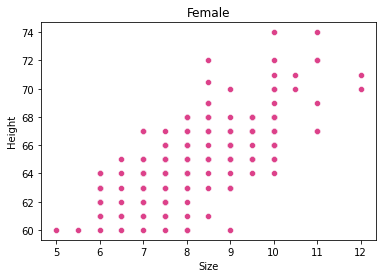

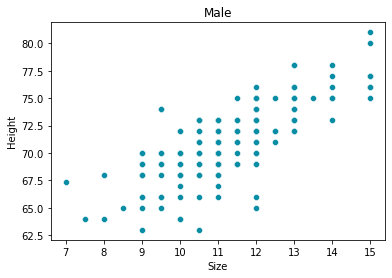

In [18]:
sns.scatterplot(x='Size', y='Height', data=f, color='#dc418a')
plt.title('Female')
plt.show()

sns.scatterplot(x='Size', y='Height', data=m, color='#088da5')
plt.title('Male')
plt.show()

In [19]:
f.corr()

,Index,Size,Height
Index,1.000000,0.772257,0.966789
Size,0.772257,1.000000,0.707812
Height,0.966789,0.707812,1.000000


The Pearson's correlation coefficient is a strongly positive correlation = .7078 w.r.t the size & height in females ie. as the height of women increases their shoe sizes also increases. 

In [20]:
m.corr()

,Index,Size,Height
Index,1.000000,0.786608,0.963312
Size,0.786608,1.000000,0.767709
Height,0.963312,0.767709,1.000000


Also the Pearson's correlation coefficient is strongly positive in this case .7677 which is nearing 1 which is the highest correaltion factor. So in case of men as well as their height increases their shoe size also increases. 

### 6. Breast cancer dataset-PCA 


### 6.1

In [21]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [22]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [23]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('After replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object
After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


In [24]:
data2 = data['Bare Nuclei']
data['Bare Nuclei'] = data2.fillna(data2.median())

In [25]:
y = data['Class'].values
features=[]

for col in data.columns:
    features.append(col)
    
features.pop(len(features)-1)
features

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [26]:
from sklearn.preprocessing import StandardScaler

x= data[features].values

x=StandardScaler().fit_transform(x) ## To standardize the features 

pd.DataFrame(data=x, columns=features).head() 



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


#### Importing PCA from sklearn

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalcomponents =pca.fit_transform(x)

In [28]:
pca_df = pd.DataFrame(data=principalcomponents, columns=['PC1', 'PC2'])

target = pd.Series(data['Class'], name ='Class')

result_pca_df = pd.concat([pca_df, target], axis = 1)
result_pca_df.head(10)

,PC1,PC2,Class
0,-1.456220,-0.110210,2
1,1.466279,-0.544894,2
2,-1.579311,-0.074854,2
3,1.505247,-0.558853,2
4,-1.330551,-0.089657,2
5,5.054140,-1.542614,4
6,-1.057400,-0.518582,2
7,-1.651934,0.016774,2
8,-1.526659,2.354349,2
9,-1.580810,0.019803,2


#### PCA scatter plot

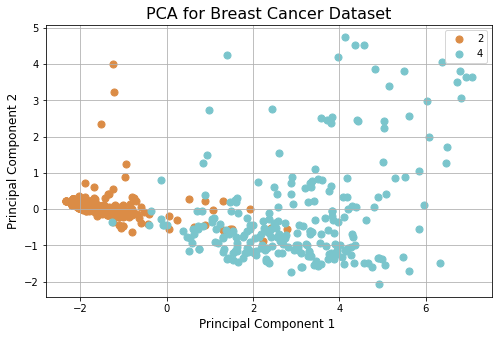

In [29]:
fig = plt.figure(figsize= (8, 5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1 ', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('PCA for Breast Cancer Dataset', fontsize=16)

targets=[2,4]
colors=['#db8c46', '#7ac5cc']
for target, color in zip (targets, colors):
    indicesToKeep= data['Class'] == target
    ax.scatter(result_pca_df.loc[indicesToKeep, 'PC1'], 
               result_pca_df.loc[indicesToKeep, 'PC2'], 
               c=color, 
               s=50)
ax.legend(targets)
ax.grid()
                                                                         
                                 
               


#### Observation: 
In PCA Analysis- When the variables are closer forming a shorter angle, they represent a positive correlation and when they diverge to form larger angles (close to 180 degree) they are negatively correlated. 

In the PCA Analysis of our breast cancer data - we see that the classes 2 & 4 are negatively correlated as they are further from each other in most cases forming angles close to 180 degrees. 

## Assignment 1- Part 2

### 1. Relationship that can be inferred from ACT Composite Score & SAT Total Score

The correlation coefficient between ACT Composite Score & SAT Total Score is 0.8858
Since the strength of a relationship is measured between -1 and +1 and a positive no. closing to 1 shows a strong corelation between the two variables. In our case the ACT Composite Score & SAT Total Score is 0.8858 which is very close to 1 and shows that the variables ACT composite score and the SAT total score are directly related to each other ie. as the value of ACT Composite score goes up so does the SAT Total Score. 

This relationship can be seen very well in the scatter-plot below between ACT composite score and SAT TOTAL SCORE which shows a positive corelation with data points almost making a straight line. 

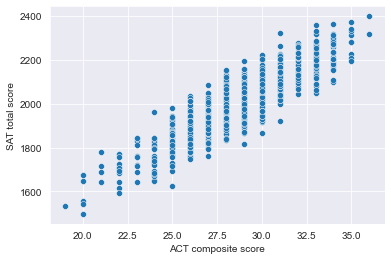

In [30]:
# Loading dataset (http://roycekimmons.com/tools/generated_data)
import pandas as pd

df_gr = pd.read_csv('graduation_rate.csv')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df_gr)
plt.show()


### 2. Relation between Parental level of education and Parental Income - Box Plot

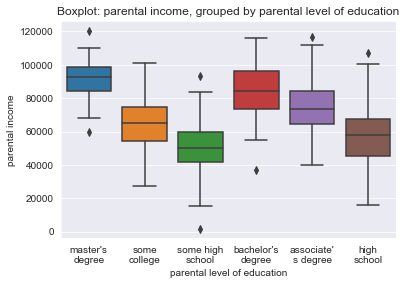

In [31]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df_gr)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()


The above box plots show that there is difference in the parental incomes wrt to the parental level of education as the medians vary for all the box plots especially for the parents with master's degree. The median line of parents with master's degree lie outside all other degree holders except for parent's with a bachelor's degree. 

#### Rows corresponding to Outliers in Parental Income of Parents with a master's degree

In [32]:
df_gr.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4


In [33]:
df_gr.columns = [c.replace(' ', '_') for c in df_gr.columns]
df_gr.head()

,ACT_composite_score,SAT_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4


In [34]:
df_gr1 = df_gr.drop(columns=(['ACT_composite_score', 'SAT_total_score', 'high_school_gpa', 'college_gpa', 'years_to_graduate']))

In [35]:
df_gr1.describe()

,parental_income
count,1000.000000
mean,66564.905000
std,19451.865744
min,1882.000000
25%,53443.000000
50%,65441.000000
75%,79845.250000
max,120391.000000


In [36]:
sorted_PI = df_gr['parental_income'].sort_values(ascending = True)
q1, q3 = np.percentile(sorted_PI, [25,75])
IQR = q3-q1
LB = q1 - (1.5* IQR)
UB = q3 + (1.5*IQR)

outlier_low = df_gr.loc[sorted_PI < LB]
outlier_low = outlier_low.loc[outlier_low['parental_level_of_education']== "master's degree"]

outlier_upper = df_gr.loc[sorted_PI > UB]
outlier_upper = outlier_upper.loc[outlier_upper['parental_level_of_education']== "master's degree"]

print(outlier_low)
print(outlier_upper)

Empty DataFrame
Columns: [ACT_composite_score, SAT_total_score, parental_level_of_education, parental_income, high_school_gpa, college_gpa, years_to_graduate]
Index: []
     ACT_composite_score  SAT_total_score parental_level_of_education  \
411                   31             2108             master's degree   

     parental_income  high_school_gpa  college_gpa  years_to_graduate  
411           120391              4.0          3.6                  4  


### 3. Importance of Scaling features so that magnitudes are comparable when computing distances

Scaling is an important step in the data-preprocessing phase. 
There are mainly two types of scaling- Normalization & Standardization. 

Feature scaling is the process of transforming the features in a dataset so that their values share a similar scale for example for a product dataset where there is quantity and price for different items- While computing an analysis,the feature in the dataset with a bigger scale would end up dominating the feature with a smaller scale and thus skew the data analysis.  

Feature scaling is also an important aspect in Principal Component Analysis.

### 4.  Distance Matrix Visualization- Inference

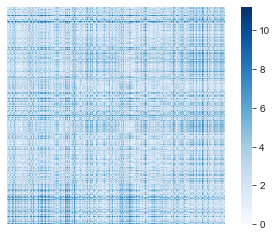

In [37]:
from sklearn.preprocessing import StandardScaler

df_sorted = df_gr.sort_values(by='parental_level_of_education', ascending=True)
parental_education_sorted = df_sorted['parental_level_of_education']

X = df_sorted.drop(columns='parental_level_of_education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Blues')
    
plt.show()

The lighter color here represents the students with parents who have some high school degree whereas the darker color represents the students who have masters degree, the dark blue shades are further away from the white-blue shades and it confirms that the average distance between students whose parents only have some high school education and students whose parents have a master's degree is larger than the average distance between students whose parents only have some high school education. 

### 5. In Section 2, increase the number of evenly spaced numbers from 10 to 100 for both axes and observe the corresponding heat map created through nearest neighbour interpolation. Read about this interpolation method and explain what you observed

In [38]:
import numpy as np
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df_gr = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df_gr)

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.979798,-1.0,1.960004
2,-0.959596,-1.0,1.920824
3,-0.939394,-1.0,1.882461
4,-0.919192,-1.0,1.844914
...,...,...,...
9995,0.919192,1.0,1.844914
9996,0.939394,1.0,1.882461
9997,0.959596,1.0,1.920824
9998,0.979798,1.0,1.960004


C:\Users\Natisha\AppData\Local\Temp\ipykernel_22408\4119999521.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


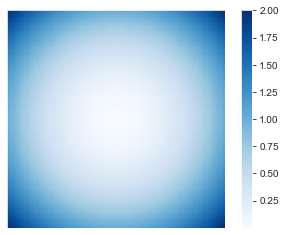

In [39]:
## Heatmap 

# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

#### Observation:

Increasing the number of evenly spaced numbers from 10 to 100 does a smoothening effect on the heatmap, from having distinct boundaries into converting them into a smoothened space where the boundaries are not really distinctly recognizable anymore. 

### 6.1 Loading wine dataset from sklearn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)


In [40]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = pd.Series(data.target)
target = df['target']

In [41]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Computing Frequency of each value of the target feature

In [42]:
df['target'].value_counts(sort=False)

0    59
1    71
2    48
Name: target, dtype: int64

### 6.2 Univariate & Multivariate Summaries for all numerical features (except the target features)

#### Univariate Summary

In [43]:
df1 = df.drop(['target'], axis =1)
df1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Multivariate Summary

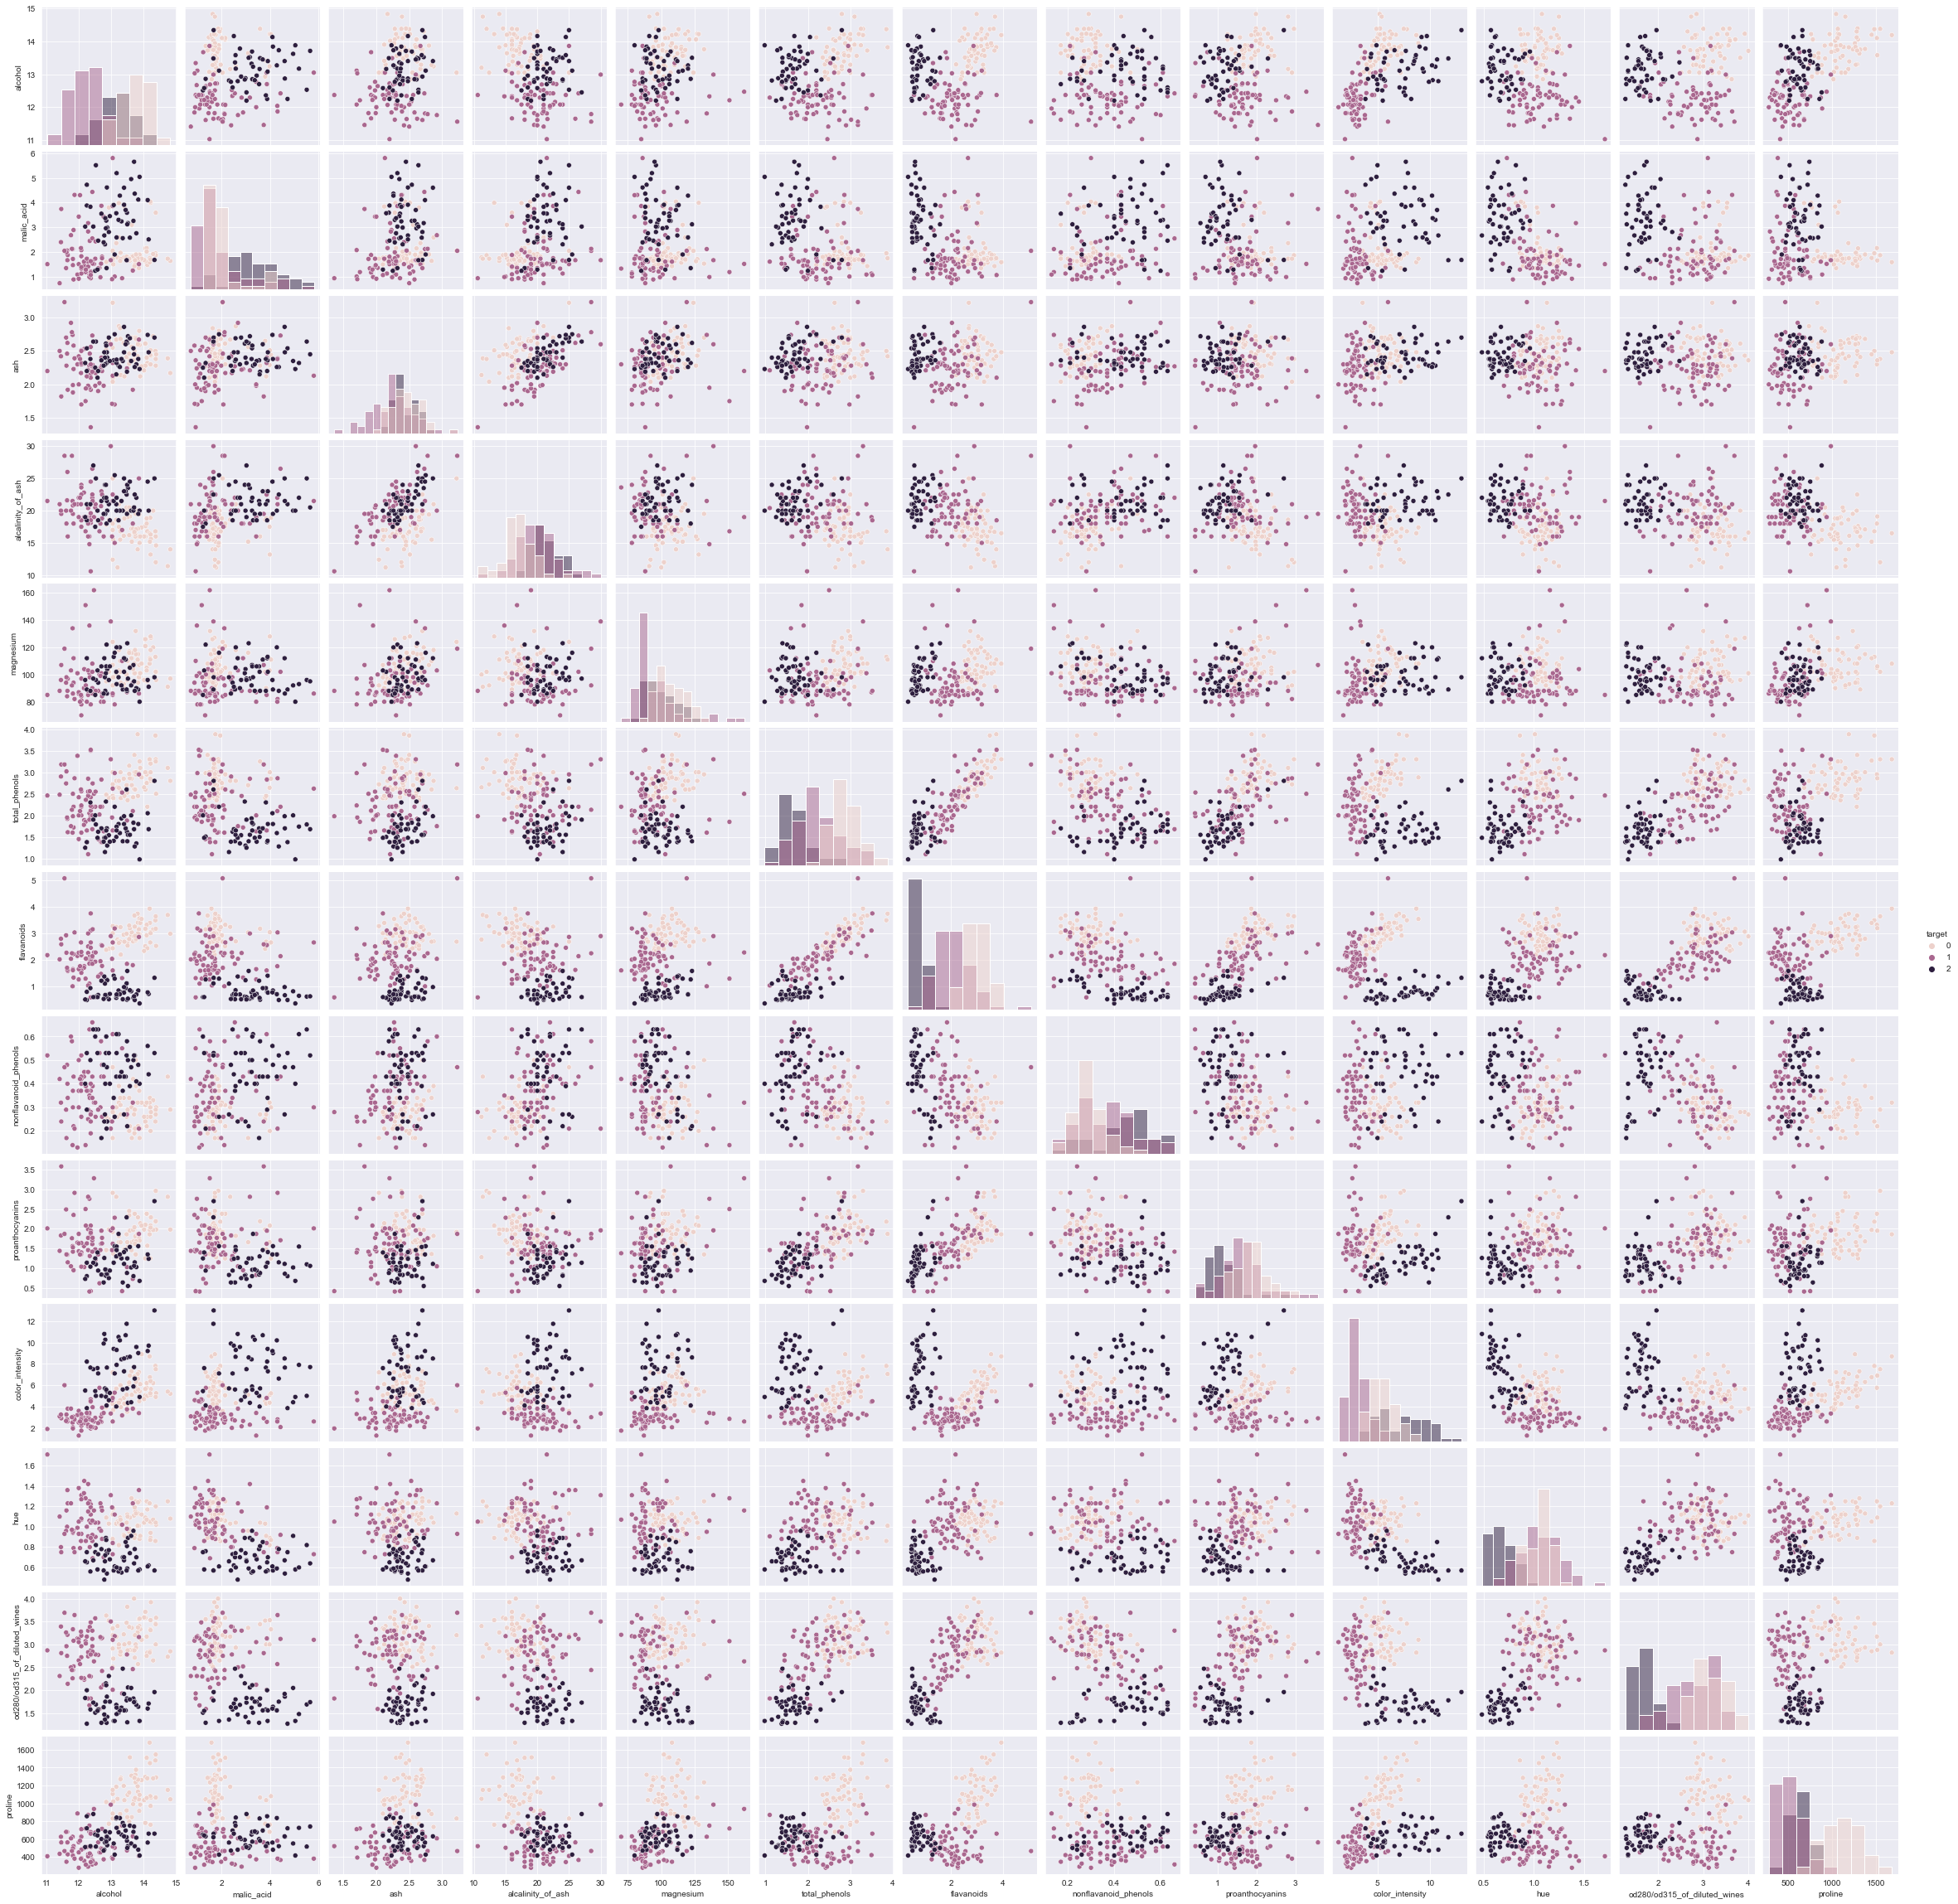

In [44]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

#### Median of Target features

In [45]:
display(df.groupby('target').median())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


### 6.3 Observations grouped by the target feature- Box plot of alcohol for each group

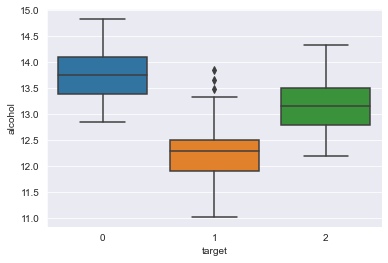

In [46]:
import textwrap
ax = sns.boxplot(x='target', y='alcohol', data=df)
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)for t in ax.get_xticklabels()])
plt.show()

### 6.4 Scatter plot for the pair of distinct numerical features with the highest correlation

#### Finding the highest correlation amongst the different alcohol types

In [47]:
df1.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


The highest correlation is between Total Phenols & Flavanoids

#### Scatterplots

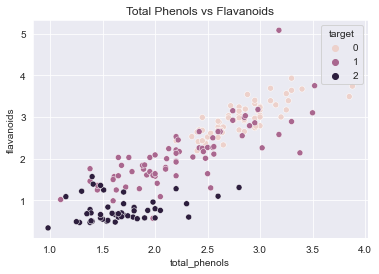

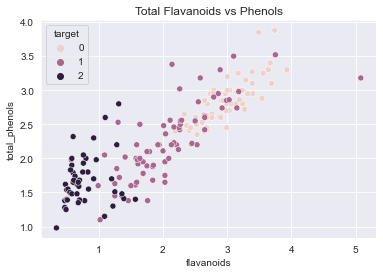

In [48]:
sns.scatterplot(x='total_phenols', y='flavanoids', data=df, hue='target').set(title="Total Phenols vs Flavanoids")

plt.show()

sns.scatterplot(x='flavanoids', y='total_phenols', data=df, hue='target').set(title="Total Flavanoids vs Phenols")
plt.show()

###  6.5 Standarizing the values & Multidimensional Scaling Projection

#### Standarizing the values

In [49]:
from sklearn.preprocessing import StandardScaler

df_2 = df.sort_values(by='target', ascending=True)
target_sorted = df_2['target']

X = df_2.drop(columns='target').to_numpy()
SS = StandardScaler()
X = SS.fit_transform(X)




#### Multidimensional Scaling Projection of the values by target features

<AxesSubplot:xlabel='x', ylabel='y'>

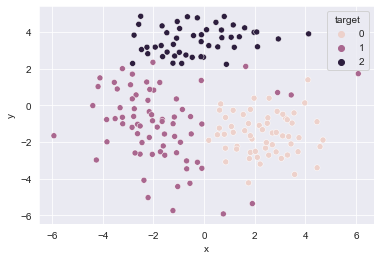

In [50]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
em= embedding.fit_transform(X)
projection = pd.DataFrame({'x': em[:,0], "y":em[:,1], "target":target_sorted})

sns.scatterplot(x="x", y="y", hue="target", data=projection)